# Decision tree regression - House pricing
## In this project I use the California house pricing data from kaggle.com to determine the region that has the most promising profit potential using a regression decision tree.
### For final decision outcome skip to section 4.
### **1. Importing and loading data**

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
house_p = pd.read_csv('California Housing Data.csv')
house_p.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
house_p.shape

(20640, 10)

### This dataset contains **20640** houses in California, with 10 features. For data cleaning steps refer to earlier demos.
### **2. Decision tree regressor and visualization**
### In this section I will be using the decision tree regressor function to partition the data using the longitude and latitude as predictors and the median house value as the target. 
### Firstly I will display the results of the decision tree and visualise a plot of each house.

[Text(0.5, 0.875, 'latitude <= 37.935\nsamples = 20640\nvalue = 206855.817'),
 Text(0.25, 0.625, 'longitude <= -121.865\nsamples = 17106\nvalue = 220516.892'),
 Text(0.125, 0.375, 'longitude <= -122.425\nsamples = 3225\nvalue = 291470.613'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'latitude <= 34.505\nsamples = 13881\nvalue = 204032.074'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'latitude <= 38.915\nsamples = 3534\nvalue = 140730.648'),
 Text(0.625, 0.375, 'longitude <= -122.38\nsamples = 2439\nvalue = 159052.035'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'longitude <= -121.225\nsamples = 1095\nvalue = 99921.642'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

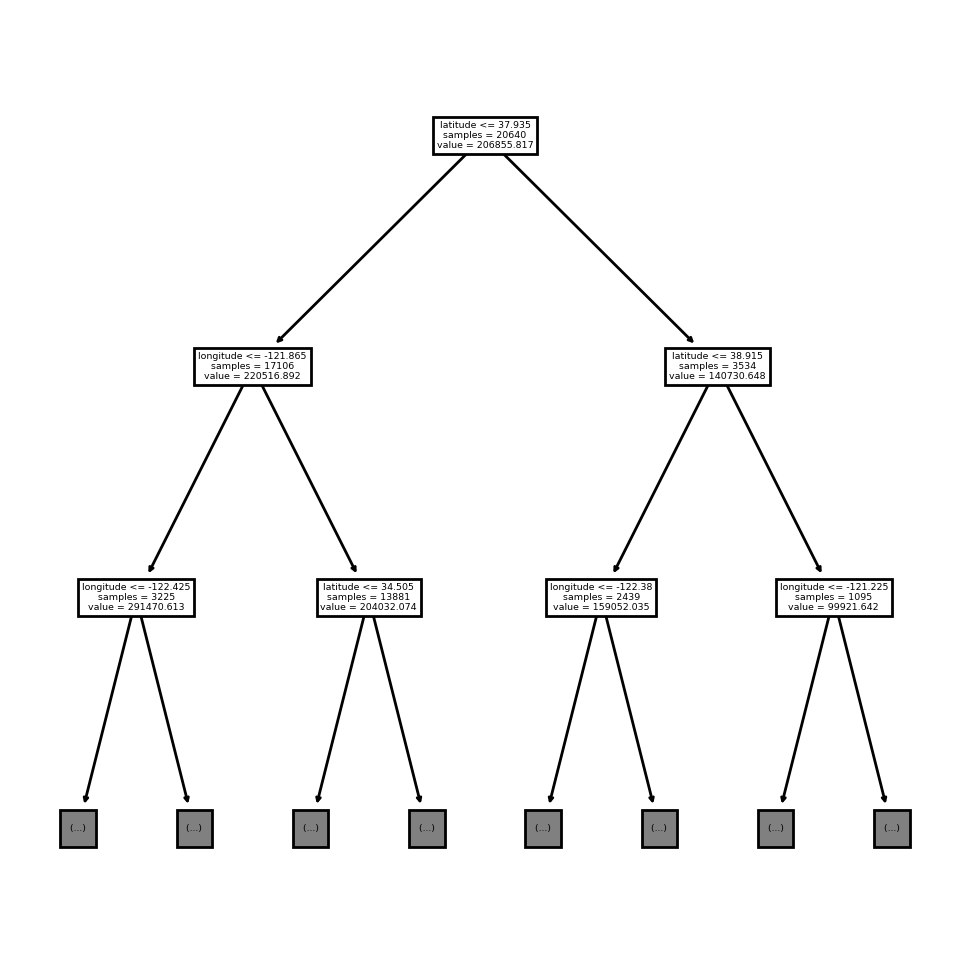

In [21]:
# Assigning predictors and response
X = house_p[['longitude','latitude']]
y = house_p['median_house_value']

# Fitting a decision tree regressor
regressor = DecisionTreeRegressor(random_state= 0)
regressor = regressor.fit(X, y)

# Displaying the decision tree to a maximum of two
plt.figure(figsize= (6,6), dpi= 200)
plot_tree(regressor, max_depth= 2, feature_names= X.columns.tolist(), impurity= False)

<Axes: xlabel='longitude', ylabel='latitude'>

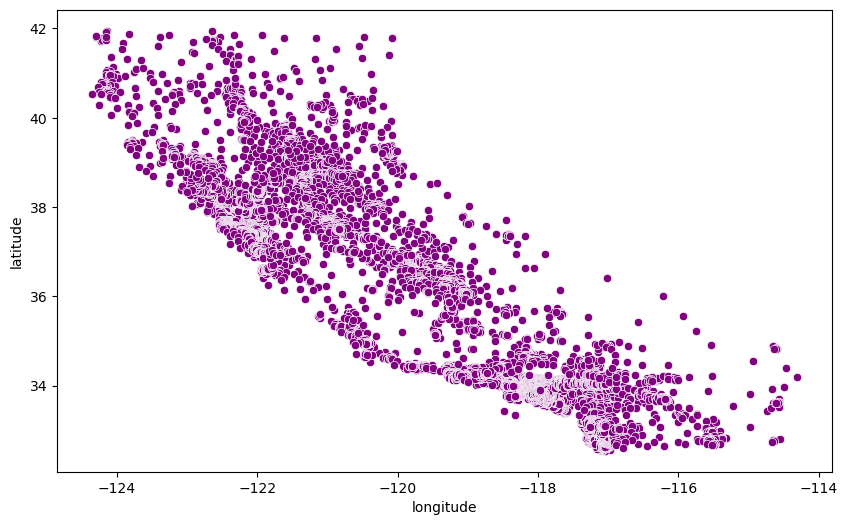

In [27]:
plt.figure(figsize= (10,6))
sns.scatterplot(x= house_p['longitude'], y= house_p['latitude'], color= 'purple')

### **3. Interpreting results of decision tree**
### Using the decision tree, the data is first partitioned by the latitude, this is referred as the root node. We can assume that latitude is the most significant predictor in determing the value of a house. This further implies that the future value of a house can be determined using its geographical location.
### On each node, the sample refers to the number of houses that are classified in that region and the value refers to the median house value in the region.
### The tree has been limited to the first two levels for a simpler visualization. The left branch of each node denotess that the conditional statement is true.
### **4. Deciding factor**
### In order to decide on the region with the most profit potential, we have to consider the cost of property acquisition and determine the amount properties in the region can be sold for.
### With this in mind, and the results of the decision tree, we can group the areas into two regions. Region A consists of areas with a latitude of 37.935 and below, region B are areas with a latitude above 37.935.
### To maximise profit, we will focus on Region A. Looking at the median value, we can conclude that properties in region A are sold at almost double the value of properties in region B. Region A has a median value of 220516,892 compared to region B with a median value of 140730,648. Therefore Region A offers the most profit potential.
### In factoring the cost of acquisition, we can further partition the data using the first level of the left branch (longitude). Region A1 will be areas with a longitude of -121.865 and below and region A2 will be areas with a longitude above -121.865. 
### Region A2 has a lower median value than A1 thus we can conclude that properties in region A2 are cheaper than properties in region A1.
### Region A2 is also more saturated thus offering a larger market for sale. We can also assume that property saturation indicates attractive neighbourhood qualities and a stronger market demand.
### In conclusion, region A2 will be the most desirable location to maximise profit offering a good trade-off between cost of acquisition and profit potential.